In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns',None)

## Membaca file csv

In [142]:

df = pd.read_csv('../dataset/flight.csv') #disesuaikan denagn path pada masing-masing
df.shape

(62988, 23)

# Statistic Desc.

In [143]:
#Melihat kolom apa saja yang tersedia
df.sample(5)

MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER  WORK_CITY  \
61277      18061   1/11/2007          2/4/2007    Male         4     yining   
3849       36634   3/27/2006         3/27/2006    Male         4  guangzhou   
41042      15288  11/18/2011        11/18/2011  Female         4     nanhai   
44292      20301   5/26/2005          8/4/2005    Male         4     suzhou   
35641       6296   2/22/2012         2/22/2012    Male         4    beijing   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  FLIGHT_COUNT  BP_SUM  \
61277      xinjiang           CN  42.0  3/31/2014             2    1000   
3849      guangdong           CN  45.0  3/31/2014            32   35883   
41042     guangdong           CN  45.0  3/31/2014             3    3783   
44292       jiangsu           CN  41.0  3/31/2014             5    3686   
35641       beijing           CN  46.0  3/31/2014             3    4928   

       SUM_YR_1  SUM_YR_2  SEG_KM_SUM LAST_FLIGHT_DATE  LAST_TO_END  \
61277       0.0     688.0        1102         2/4/2014           57   
3849     8208.0   26563.0       56666        1/27/2014           65   
41042       0.0    3578.0        5608       11/19/2013          134   
44292    2276.0    1544.0        5206        3/31/2014            1   
35641    4899.0       0.0        6992        3/17/2013          381   

       AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  Points_Sum  \
61277    285.000000           285               0      0.930000        1000   
3849      20.645161           199               0      0.690684       36173   
41042     76.000000           147               0      0.789169        3783   
44292    181.500000           351               1      0.719917        3986   
35641    112.500000           210               0      0.819050        4928   

       Point_NotFlight  
61277                0  
3849                 1  
41042                0  
44292                2  
35641                0

## 1. Melihat info keseluruhan data

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

## 2. Untuk kolom yang bertipe data object yang memiliki unique value banyak

In [145]:
df.select_dtypes(include='object').nunique()

FFP_DATE             3068
FIRST_FLIGHT_DATE    3406
GENDER                  2
WORK_CITY            3234
WORK_PROVINCE        1165
WORK_COUNTRY          118
LOAD_TIME               1
LAST_FLIGHT_DATE      731
dtype: int64

Untuk data yang bertipe object/ kategori dengan unique value banyak, untuk kolom tersebut apakah akan di drop atau bagaimana?

## 3. Merubah tipe data objek menjadi date

In [146]:

df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'],  errors='coerce')
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'], errors='coerce')
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'],  errors='coerce')
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'], errors='coerce')


Terdapat ketidaksesuaian tipe data date yang ternyata adalah tipe data object diantaranya adalah:
1. FFP_DATE
2. FIRST_FLIGHT_DATE
3. LAST_FLIGHT_DATE
4. LOAD_TIME

Terhadap tipe data yang tidak sesuai maka perlu dilakukan penyesuian yaitu dengan merubah tipe data object menjadi date

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62988 non-null  int64         
 1   FFP_DATE           62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 3   GENDER             62985 non-null  object        
 4   FFP_TIER           62988 non-null  int64         
 5   WORK_CITY          60719 non-null  object        
 6   WORK_PROVINCE      59740 non-null  object        
 7   WORK_COUNTRY       62962 non-null  object        
 8   AGE                62568 non-null  float64       
 9   LOAD_TIME          62988 non-null  datetime64[ns]
 10  FLIGHT_COUNT       62988 non-null  int64         
 11  BP_SUM             62988 non-null  int64         
 12  SUM_YR_1           62437 non-null  float64       
 13  SUM_YR_2           62850 non-null  float64       
 14  SEG_KM

## 4. Melihat data kosong

In [148]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE      421
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

Terdapat banyak data yang kosong diantaranya ada pada kolom:
1. WORK_CITY     =        2269
2. WORK_PROVINCE =        3248
3. WORK_COUNTRY  =        26
4. AGE           =        420
5. SUM_YR_1      =        551
6. SUM_YR_2      =        138


Untuk data yang kosong perlu penanganan khusus jika ingin digunakan.

## 5. Melihat data yang duplikat

In [149]:
df.duplicated().sum()

0

## 6. Mengelompokkan data

In [150]:
df.select_dtypes(include='int64'or'float64').columns.tolist()

['MEMBER_NO',
 'FFP_TIER',
 'FLIGHT_COUNT',
 'BP_SUM',
 'SEG_KM_SUM',
 'LAST_TO_END',
 'MAX_INTERVAL',
 'EXCHANGE_COUNT',
 'Points_Sum',
 'Point_NotFlight']

In [151]:
df.select_dtypes(include='object').columns.tolist()

['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY']

In [152]:
df.select_dtypes(include='datetime64[ns]').columns.tolist()

['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']

In [153]:

cats= ["GENDER", "WORK_CITY", "WORK_PROVINCE","WORK_COUNTRY" ]
nums= ["FFP_TIER","AGE","FLIGHT_COUNT","BP_SUM",
"SUM_YR_1",
"SUM_YR_2",
"SEG_KM_SUM",
"LAST_TO_END",
"AVG_INTERVAL",
"MAX_INTERVAL",
"EXCHANGE_COUNT",
"avg_discount",
"Points_Sum",
"Point_NotFlight" ]
date= ["FFP_DATE",
"FIRST_FLIGHT_DATE",
"LAST_FLIGHT_DATE",
"LOAD_TIME"]

* ## Melihat informasi pada kolom kategori

In [154]:
df_cats = df[cats].copy()
df_cats.describe()

GENDER  WORK_CITY WORK_PROVINCE WORK_COUNTRY
count   62985      60719         59740        62962
unique      2       3234          1165          118
top      Male  guangzhou     guangdong           CN
freq    48134       9386         17509        57748

* ## Melihat informasi pada kolom numerikal

In [155]:
df[nums].describe()

FFP_TIER           AGE  FLIGHT_COUNT         BP_SUM       SUM_YR_1  \
count  62988.000000  62568.000000  62988.000000   62988.000000   62437.000000   
mean       4.102162     42.476346     11.839414   10925.081254    5355.376064   
std        0.373856      9.885915     14.049471   16339.486151    8109.450147   
min        4.000000      6.000000      2.000000       0.000000       0.000000   
25%        4.000000     35.000000      3.000000    2518.000000    1003.000000   
50%        4.000000     41.000000      7.000000    5700.000000    2800.000000   
75%        4.000000     48.000000     15.000000   12831.000000    6574.000000   
max        6.000000    110.000000    213.000000  505308.000000  239560.000000   

            SUM_YR_2     SEG_KM_SUM   LAST_TO_END  AVG_INTERVAL  MAX_INTERVAL  \
count   62850.000000   62988.000000  62988.000000  62988.000000  62988.000000   
mean     5604.026014   17123.878691    176.120102     67.749788    166.033895   
std      8703.364247   20960.844623    183.822223     77.517866    123.397180   
min         0.000000     368.000000      1.000000      0.000000      0.000000   
25%       780.000000    4747.000000     29.000000     23.370370     79.000000   
50%      2773.000000    9994.000000    108.000000     44.666667    143.000000   
75%      6845.750000   21271.250000    268.000000     82.000000    228.000000   
max    234188.000000  580717.000000    731.000000    728.000000    728.000000   

       EXCHANGE_COUNT  avg_discount   Points_Sum  Point_NotFlight  
count    62988.000000  62988.000000   62988.0000     62988.000000  
mean         0.319775      0.721558   12545.7771         2.728155  
std          1.136004      0.185427   20507.8167         7.364164  
min          0.000000      0.000000       0.0000         0.000000  
25%          0.000000      0.611997    2775.0000         0.000000  
50%          0.000000      0.711856    6328.5000         0.000000  
75%          0.000000      0.809476   14302.5000         1.000000  
max         46.000000      1.500000  985572.0000       140.000000

* ## Melihat informasi pada kolom date

In [156]:
df[date].describe()

FFP_DATE              FIRST_FLIGHT_DATE  \
count                       62988                          62988   
mean   2010-03-06 23:58:48.672128  2010-09-01 17:59:44.911411968   
min           2004-11-01 00:00:00            1905-12-31 00:00:00   
25%           2008-04-12 00:00:00            2008-12-14 18:00:00   
50%           2010-10-08 00:00:00            2011-04-23 00:00:00   
75%           2012-03-29 00:00:00            2012-07-26 00:00:00   
max           2013-03-31 00:00:00            2015-05-30 00:00:00   

                    LAST_FLIGHT_DATE                      LOAD_TIME  
count                          62567                          62988  
mean   2013-10-06 15:32:03.103233280  2014-03-30 23:59:59.999999744  
min              2012-04-01 00:00:00            2014-03-31 00:00:00  
25%              2013-07-07 00:00:00            2014-03-31 00:00:00  
50%              2013-12-14 00:00:00            2014-03-31 00:00:00  
75%              2014-03-03 00:00:00            2014-03-31 00:00:00  
max              2014-03-31 00:00:00            2014-03-31 00:00:00

## 7. Analisa Univariate

* ## 7.1 Visualisasi distribusi setiap kolom yang bertipe data  Numbers

* ## Histrogram Plot

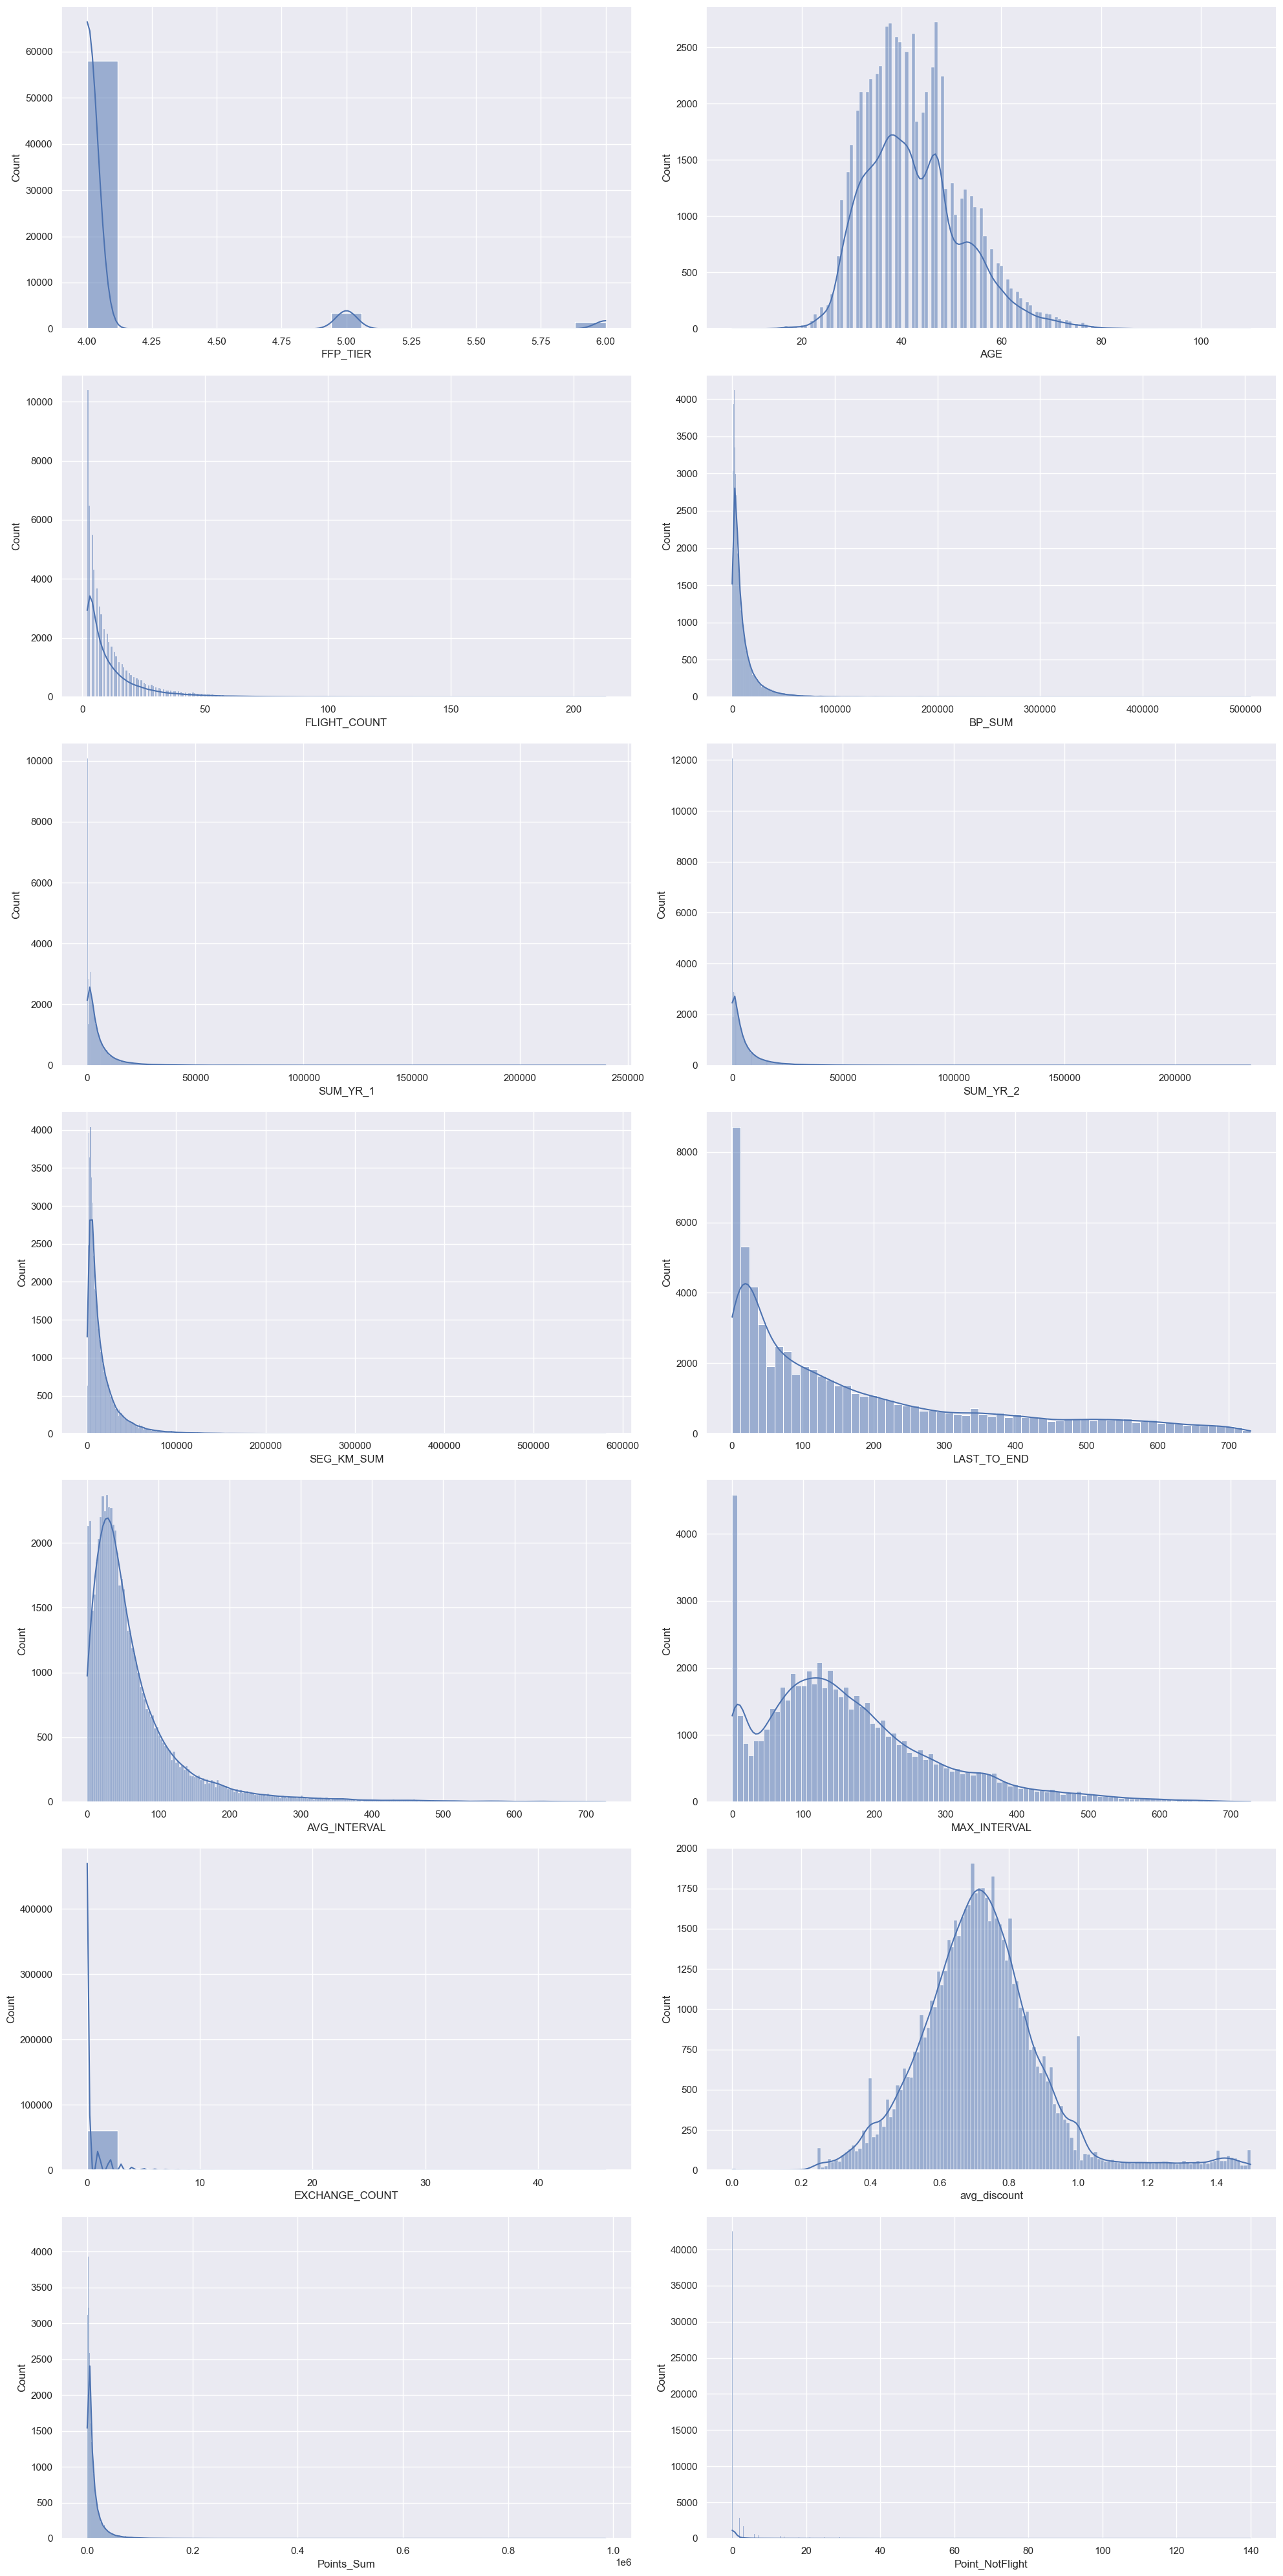

In [157]:
fig, axs = plt.subplots(nrows=7, ncols=2, figsize = (20,40))
axs = axs.flatten()

for i, var in enumerate (nums):
    sns.histplot(x=var, data=df, kde=True, ax=axs[i])
   
    
fig.tight_layout()
plt.show()

Penjelasan distribusi:
1. FFP_TIER: Nilai pada kolom ini hanya berada pada 4,5 dan 6. Untuk distribusi terbanyak berada pada nilai 4.
2. AGE: Nilai distibusi pada kolom ini hampir berbentuk normal, sebaran terbanyak berada pada umur sekitar 40 tahun.
3. AVG_DISCOUNT: Memiliki distribusi normal.
4. MAX_Interval: Memiliki bentuk distribusi yang hampir mendekati dengan positively skew
5. EXCHANGE_COUNT: nilainya terpusat pada nilai yang kecil yaitu 0 sampai 5.

Untuk kolom Flight_count, BP_sum, SUM_YR_1, SUM_YR_2, SEG_KM_SUM, LAST_TO_END, AVG_Interval dan POINTS_SUM memiliki bentuk pesebaran postively skew.

* ## Box Plot

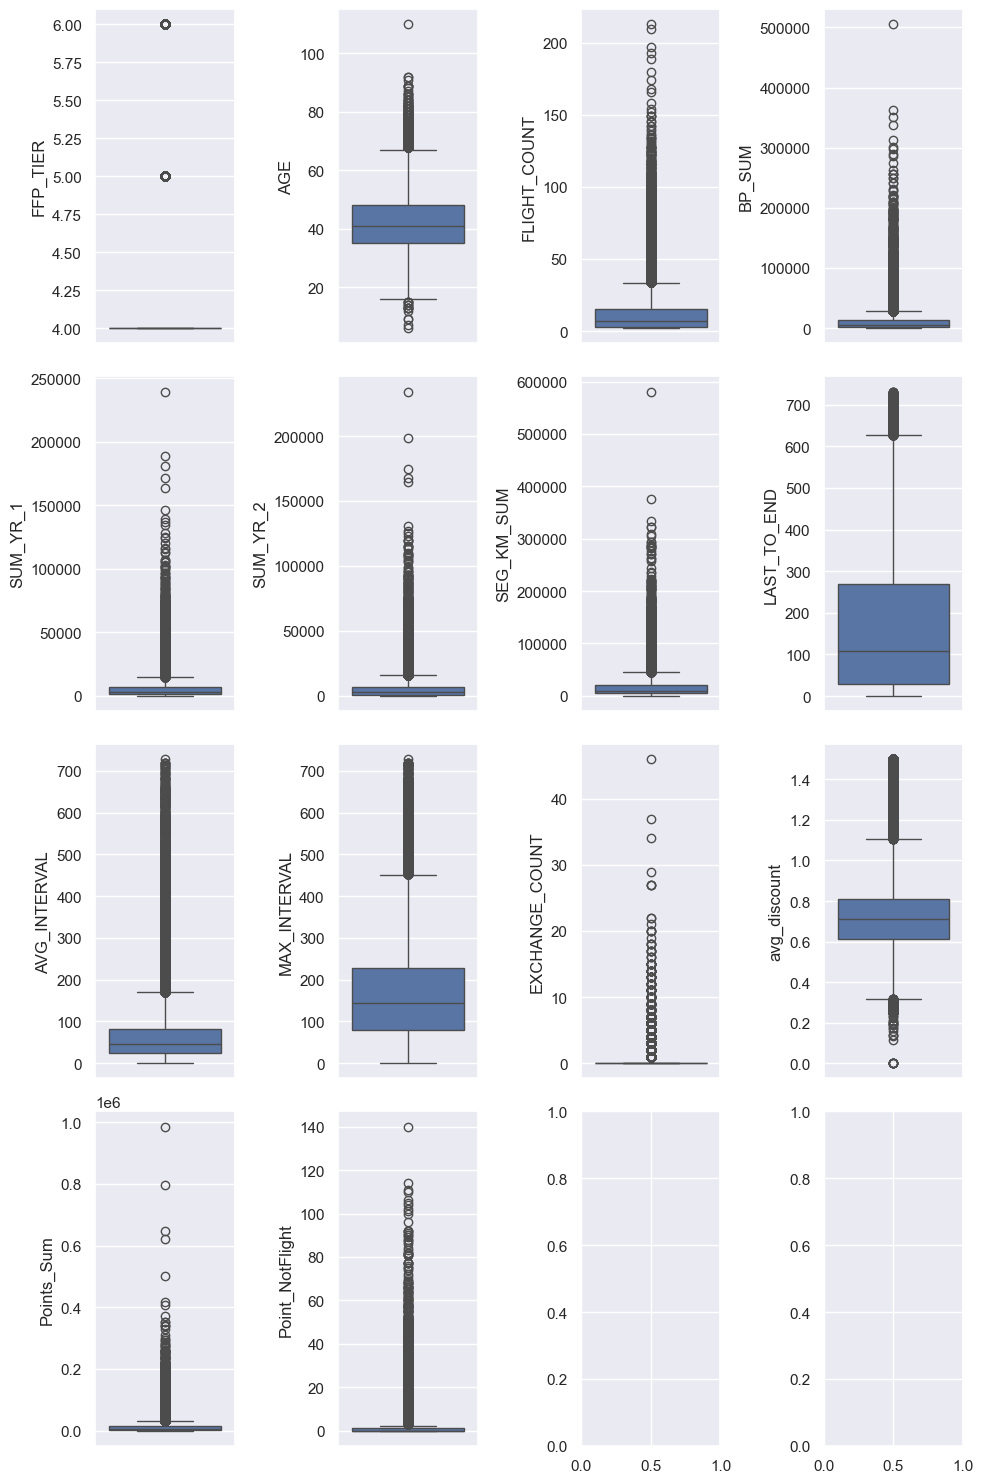

In [159]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize = (10,15))
axs = axs.flatten()

for i, var in enumerate (nums):
    sns.boxplot(y=var, data=df, ax=axs[i])
    
fig.tight_layout()

plt.show()


## 7. 2 Visualisasi data kategorikal 

* ## Visualisasi data kategorikal dengan barplot horizontal

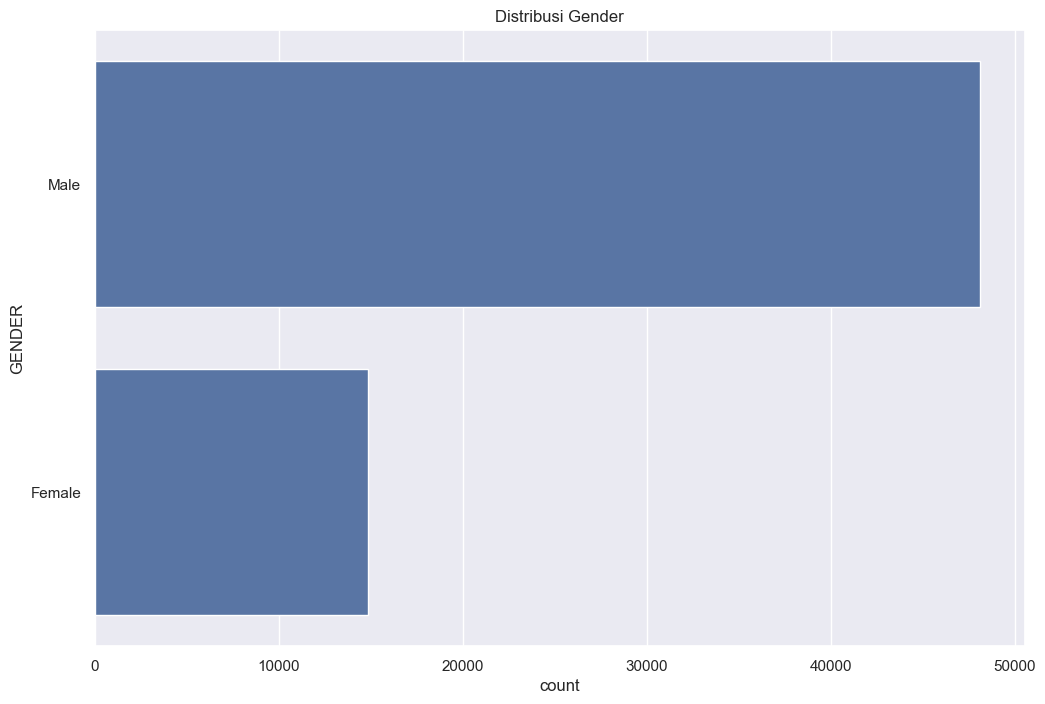

In [160]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='GENDER', order=df['GENDER'].value_counts().index)
plt.title('Distribusi Gender')
plt.show()

* ## Kolom-kolom kategorikal yang ingin dihitung top 20 nilai uniknya

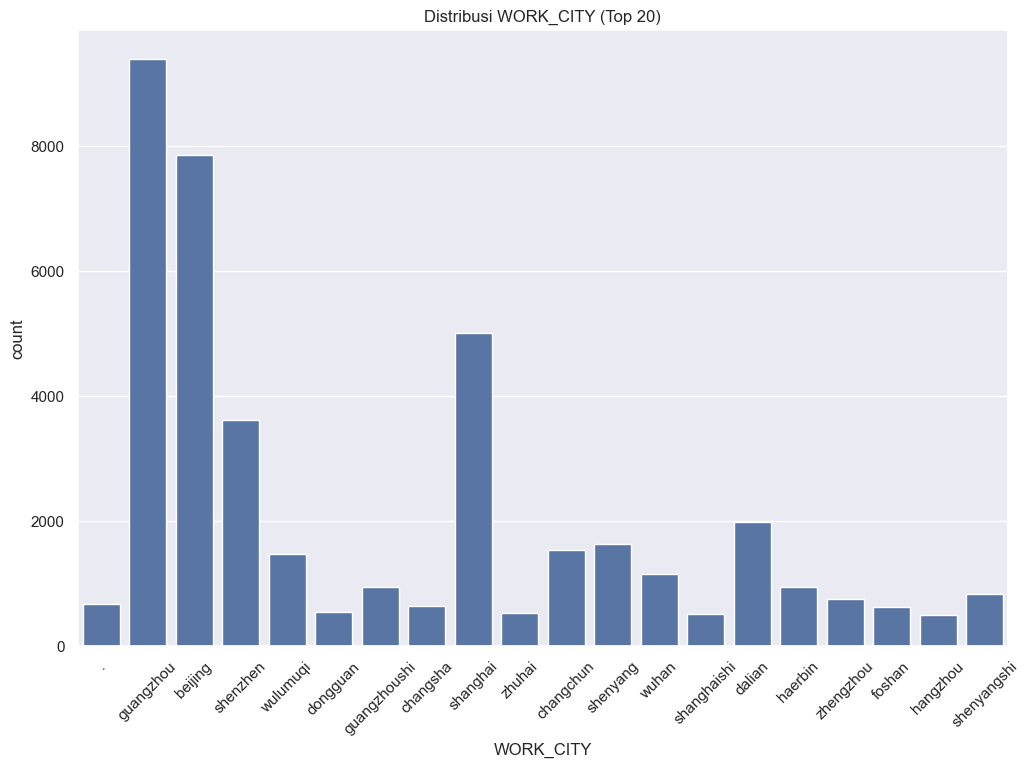

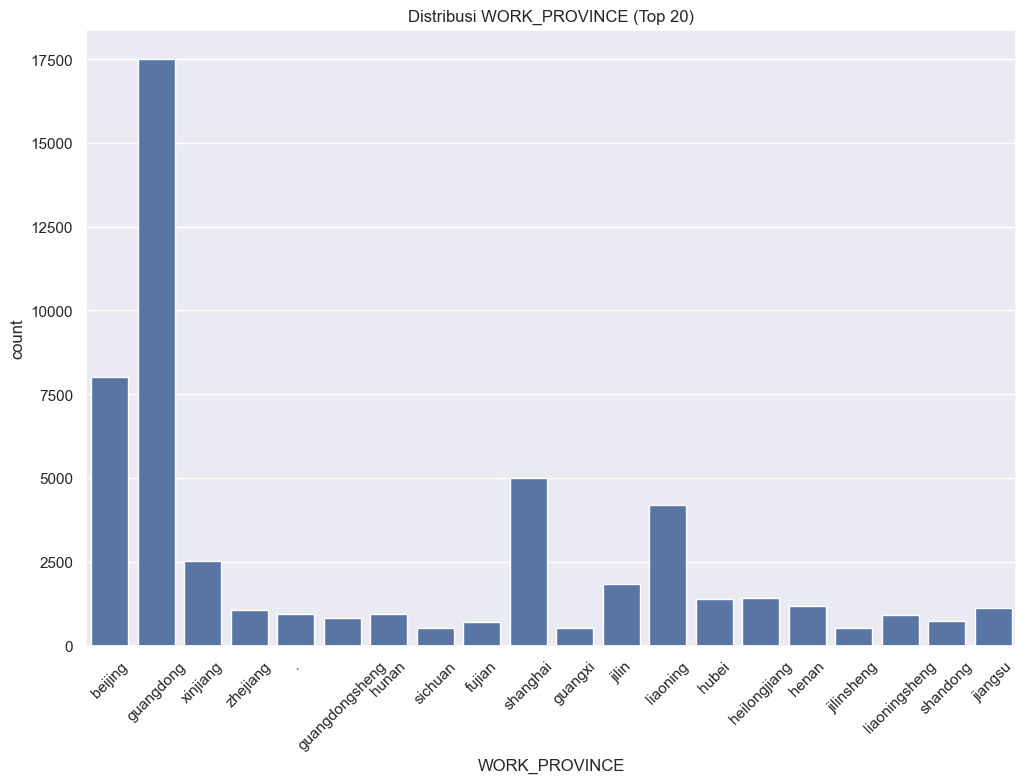

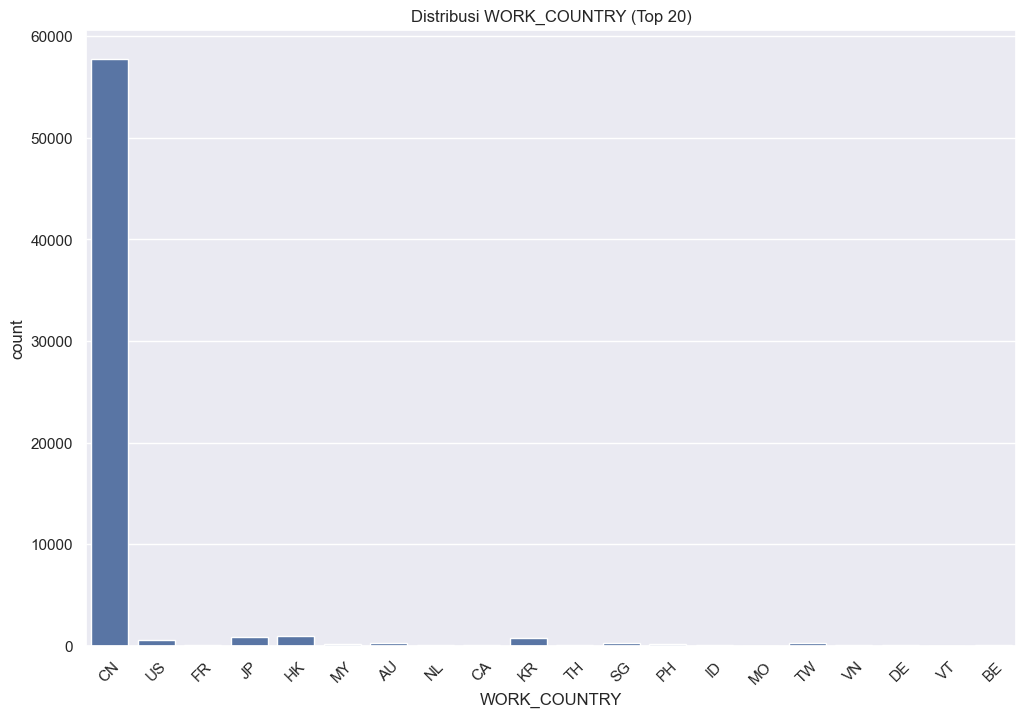

In [161]:

kat = ["WORK_CITY", "WORK_PROVINCE","WORK_COUNTRY"]

# Melakukan looping untuk setiap kolom kategorikal
for cat_column in kat:
    # Menghitung top 20 nilai unik
    top_n_values = df[cat_column].value_counts().nlargest(20).index
    
    # Membuat dataframe yang berisi hanya data dengan top 20 nilai unik
    df_filtered = df[df[cat_column].isin(top_n_values)]

    # Visualisasi data kategorikal yang telah difilter
    plt.figure(figsize=(12, 8))
    sns.countplot(data=df_filtered, x=cat_column)
    plt.title(f'Distribusi {cat_column} (Top 20)')
    plt.xticks(rotation=45)
    plt.show()

#### Terlihat jumlah laki-laki lebih dominan dibanding perempuan dalam data ini, dapat dilihat juga daerah mana saja yang paling banyak penyebarannya.

## 7.3 Visualisasi distribusi kolom bertipe data date time

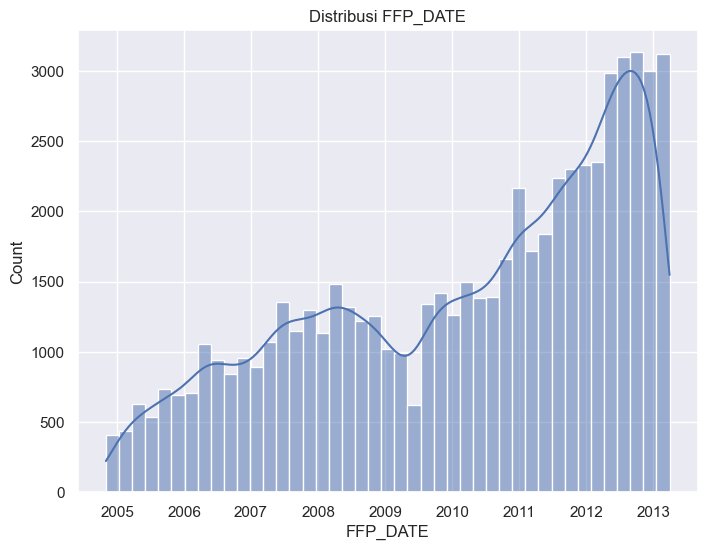

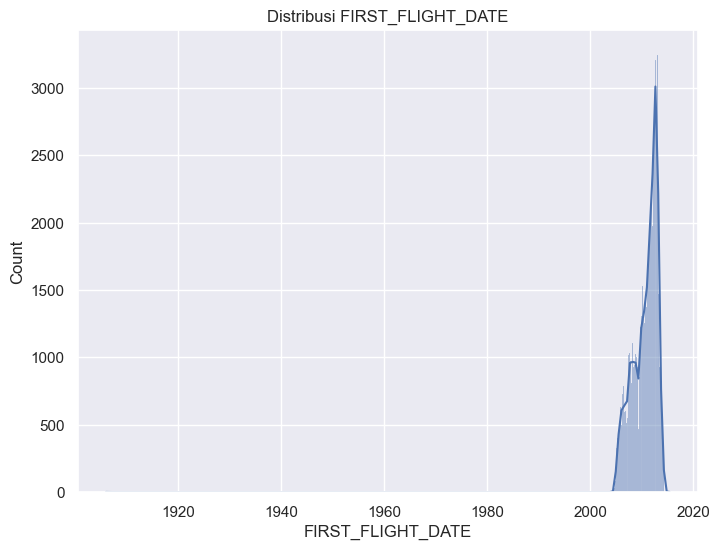

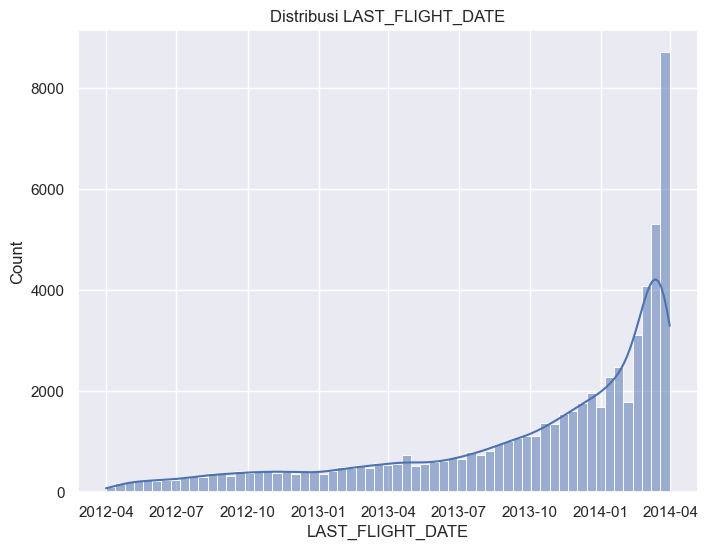

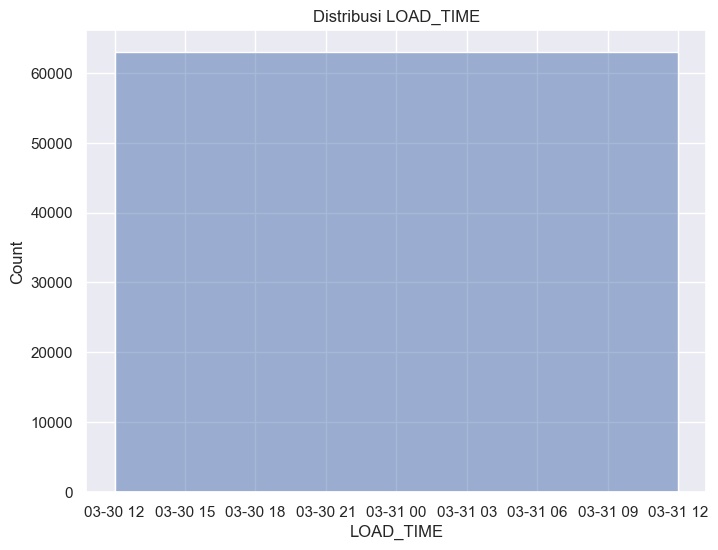

In [162]:

for column in date:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi {column}')
    plt.show()

Dapat terlihat dari grafik diatas bahwa terjadi kenaikan trend setiap tahunnya. Adapun nilai distribusi dari LOAD_TIME semuanya sama maka dapat dipertimbangkan untuk didrop.

## 8. Analisa Multivariate
### Menganalisa setiap kolom numerikal menggunakan pearson corr.

In [163]:
df[nums].corr()

FFP_TIER       AGE  FLIGHT_COUNT    BP_SUM  SUM_YR_1  \
FFP_TIER         1.000000  0.078654      0.582447  0.581085  0.463122   
AGE              0.078654  1.000000      0.073246  0.100501  0.111815   
FLIGHT_COUNT     0.582447  0.073246      1.000000  0.788379  0.748032   
BP_SUM           0.581085  0.100501      0.788379  1.000000  0.850624   
SUM_YR_1         0.463122  0.111815      0.748032  0.850624  1.000000   
SUM_YR_2         0.611385  0.083743      0.794838  0.884632  0.663009   
SEG_KM_SUM       0.522350  0.087254      0.850411  0.921724  0.804125   
LAST_TO_END     -0.206313 -0.025600     -0.404999 -0.319039 -0.186173   
AVG_INTERVAL    -0.144928 -0.024613     -0.316833 -0.246764 -0.243309   
MAX_INTERVAL    -0.127641  0.009382     -0.188682 -0.147953 -0.145206   
EXCHANGE_COUNT   0.342355  0.029604      0.502501  0.530021  0.488029   
avg_discount     0.248845  0.133235      0.139377  0.307245  0.268884   
Points_Sum       0.559249  0.074757      0.747092  0.923271  0.788354   
Point_NotFlight  0.192803 -0.092282      0.291880  0.244254  0.235095   

                 SUM_YR_2  SEG_KM_SUM  LAST_TO_END  AVG_INTERVAL  \
FFP_TIER         0.611385    0.522350    -0.206313     -0.144928   
AGE              0.083743    0.087254    -0.025600     -0.024613   
FLIGHT_COUNT     0.794838    0.850411    -0.404999     -0.316833   
BP_SUM           0.884632    0.921724    -0.319039     -0.246764   
SUM_YR_1         0.663009    0.804125    -0.186173     -0.243309   
SUM_YR_2         1.000000    0.849195    -0.423420     -0.246290   
SEG_KM_SUM       0.849195    1.000000    -0.369509     -0.280746   
LAST_TO_END     -0.423420   -0.369509     1.000000     -0.108594   
AVG_INTERVAL    -0.246290   -0.280746    -0.108594      1.000000   
MAX_INTERVAL    -0.154905   -0.155508    -0.343939      0.724392   
EXCHANGE_COUNT   0.468149    0.507819    -0.169717     -0.130226   
avg_discount     0.234652    0.108393    -0.021036     -0.038814   
Points_Sum       0.826666    0.853014    -0.292027     -0.220946   
Point_NotFlight  0.237954    0.259037    -0.124074     -0.075967   

                 MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  Points_Sum  \
FFP_TIER            -0.127641        0.342355      0.248845    0.559249   
AGE                  0.009382        0.029604      0.133235    0.074757   
FLIGHT_COUNT        -0.188682        0.502501      0.139377    0.747092   
BP_SUM              -0.147953        0.530021      0.307245    0.923271   
SUM_YR_1            -0.145206        0.488029      0.268884    0.788354   
SUM_YR_2            -0.154905        0.468149      0.234652    0.826666   
SEG_KM_SUM          -0.155508        0.507819      0.108393    0.853014   
LAST_TO_END         -0.343939       -0.169717     -0.021036   -0.292027   
AVG_INTERVAL         0.724392       -0.130226     -0.038814   -0.220946   
MAX_INTERVAL         1.000000       -0.089417     -0.016392   -0.135977   
EXCHANGE_COUNT      -0.089417        1.000000      0.112589    0.578581   
avg_discount        -0.016392        0.112589      1.000000    0.263882   
Points_Sum          -0.135977        0.578581      0.263882    1.000000   
Point_NotFlight     -0.042843        0.396115     -0.010315    0.406905   

                 Point_NotFlight  
FFP_TIER                0.192803  
AGE                    -0.092282  
FLIGHT_COUNT            0.291880  
BP_SUM                  0.244254  
SUM_YR_1                0.235095  
SUM_YR_2                0.237954  
SEG_KM_SUM              0.259037  
LAST_TO_END            -0.124074  
AVG_INTERVAL           -0.075967  
MAX_INTERVAL           -0.042843  
EXCHANGE_COUNT          0.396115  
avg_discount           -0.010315  
Points_Sum              0.406905  
Point_NotFlight         1.000000

<Axes: >

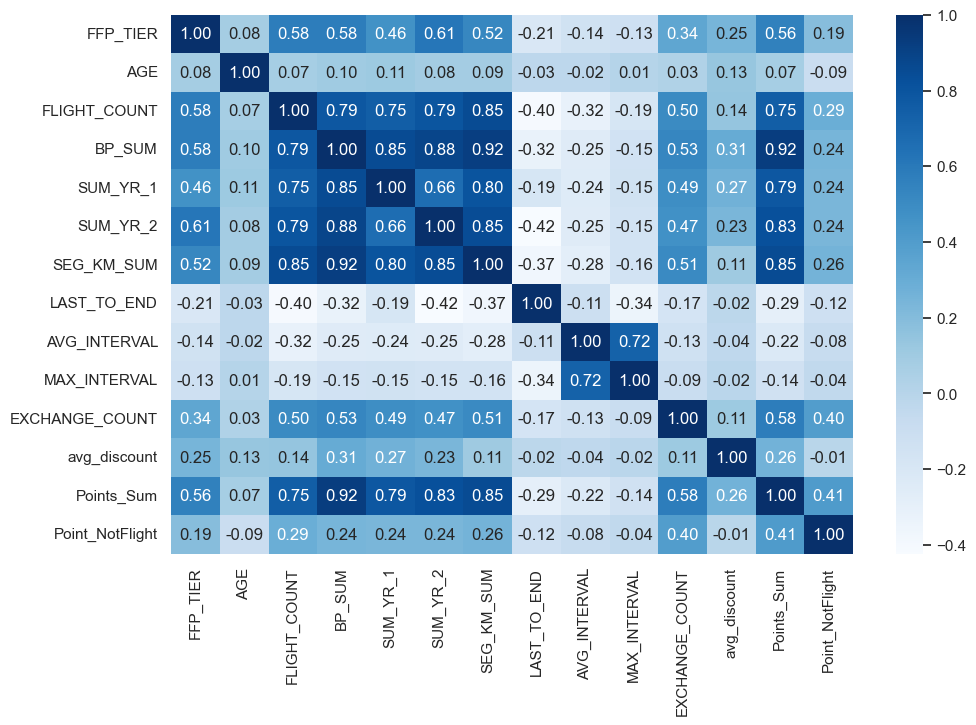

In [172]:
plt.figure(figsize=(11, 7))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

Terdapat beberapa fitur yang memiliki korelasi yang besar, maka untuk fitur-fitur yang memiliki nilai korelasi lebih dari 0.85 untuk bisa langsung dieliminasi salah satunya sehingga didapatkan 1 fitur yang tidak redundant. Diantaranya adalah:
1. BP_SUM dan Points_SUM = 0.92
2. BP_SUM dan SUM_YR_2 = 0.88
3. BP_SUM dan SEG_KM_SUM = 0.92